In [22]:
import configparser
import psycopg2

import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# connect to data warehouse
config = configparser.ConfigParser()
config.read('dwh.cfg')

try:
    conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
    cur = conn.cursor()
except psycopg2.Error as e:
    print("Error: Could not make connection to the redshift database")
    print(e)

In [26]:
def create_dataframe(data,cursor):
    column_name = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=column_name)
    return df

# Top 5 Popular Song Played.

In [46]:
# get the most song that are played.
# top 5 songs

Query = """
select title, count(songplays.user_id) total_listeners
    from songplays
    join songs on songplays.song_id = songs.song_id
    group by title
    order by total_listeners desc
    limit 5;
"""
 
cur.execute(Query)
 
top5songs = cur.fetchall()
 
print(top5songs)

[("Let's Get It Started", 3), ('The Boy With The Thorn In His Side', 2), ('Bitter Sweet Symphony', 2), ('Angie (1993 Digital Remaster)', 2), ('Astrud Astronette', 1)]


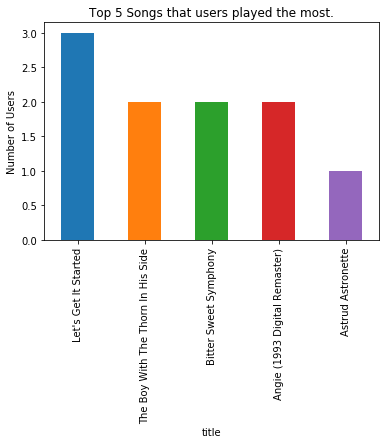

In [47]:
top5songs_df = create_dataframe(top5songs,cur)
top5songs_df[['title','total_listeners']].plot(kind='bar',
                                               x='title',
                                               y='total_listeners',
                                              title='Top 5 Songs that users played the most.',
                                              legend=False)
plt.ylabel('Number of Users')
plt.show()

# Top 5 Popular Songs in 2018

In [7]:
# top song from 2018

Query = """
    select title, count(user_id) total_listeners
    from songplays
    join songs on songplays.song_id = songs.song_id
    join time on songplays.start_time = time.start_time
    where time.year = 2018
    group by title
    order by total_listeners desc
    limit 5;
"""


cur.execute(Query)

top5songs_2018 = cur.fetchall()
 
print(top5songs_2018)

[("Let's Get It Started", 3), ('The Boy With The Thorn In His Side', 2), ('Bitter Sweet Symphony', 2), ('Angie (1993 Digital Remaster)', 2), ('Astrud Astronette', 1)]


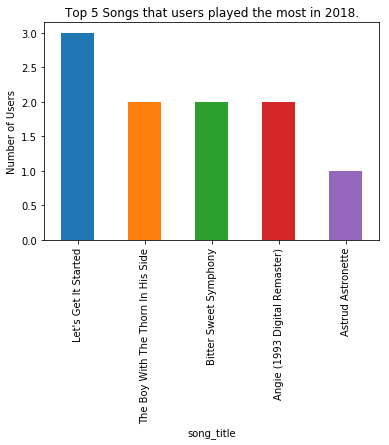

In [49]:
top5songs_2018 = create_dataframe(top5songs_2018,cur).rename(columns={'title':'song_title'})
top5songs_2018[['song_title','total_listeners']].plot(kind='bar',
                                               x='song_title',
                                               y='total_listeners',
                                              title='Top 5 Songs that users played the most in 2018.',
                                              legend=False)
plt.ylabel('Number of Users')
plt.show()

# Top 5 Listerners who has the most number of songplay

In [59]:
# top 5 user who listen the most.

Query = """
    select first_name, last_name, count(songplays.user_id) total_listeners
    from songplays
    join users on songplays.user_id = users.user_id
    group by first_name, last_name
    order by total_listeners desc
    limit 5;
"""
 
cur.execute(Query)
 
top5listener_users = cur.fetchall()
 
print(top5listener_users)

[('Chloe', 'Cuevas', 3), ('Jacob', 'Klein', 2), ('Tegan', 'Levine', 2), ('Matthew', 'Jones', 1), ('Aleena', 'Kirby', 1)]


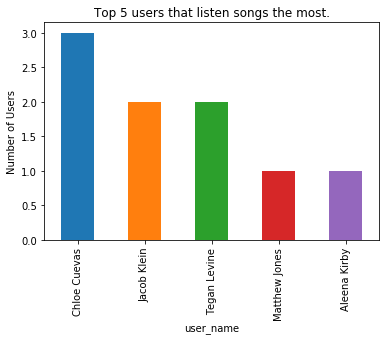

In [61]:
top5listener_users = create_dataframe(top5listener_users,cur)
top5listener_users.loc[:,'user_name'] = top5listener_users['first_name']+' '+top5listener_users['last_name']

top5listener_users[['user_name','total_listeners']].plot(kind='bar',
                                               x='user_name',
                                               y='total_listeners',
                                              title='Top 5 users that listen songs the most.',
                                              legend=False)
plt.ylabel('Number of Users')
plt.show()

# Top 5 Artists who publish a lot of song

In [69]:
# artist who pubish song the most

Query = """
    select name, count(song_id) total_songs
    from songplays
    join artists on songplays.artist_id = artists.artist_id
    group by name
    order by total_songs desc
    limit 5;
"""
 
cur.execute(Query)
 
top_publish_artist = cur.fetchall()
 
print(top_publish_artist)

[('Black Eyed Peas', 3), ('The Smiths', 2), ('The Rolling Stones', 2), ('The Verve', 2), ('Placebo', 1)]


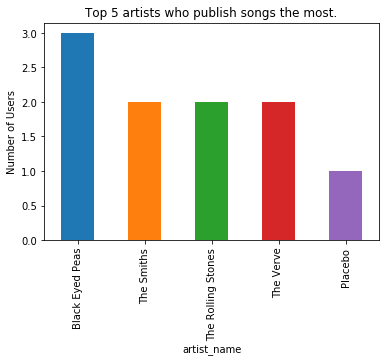

In [70]:
top_publish_artist = create_dataframe(top_publish_artist,cur).rename(columns={'name':'artist_name'})
top_publish_artist[['artist_name','total_songs']].plot(kind='bar',
                                               x='artist_name',
                                               y='total_songs',
                                              title='Top 5 artists who publish songs the most.',
                                              legend=False)
plt.ylabel('Number of Users')
plt.show()

In [71]:
conn.close()